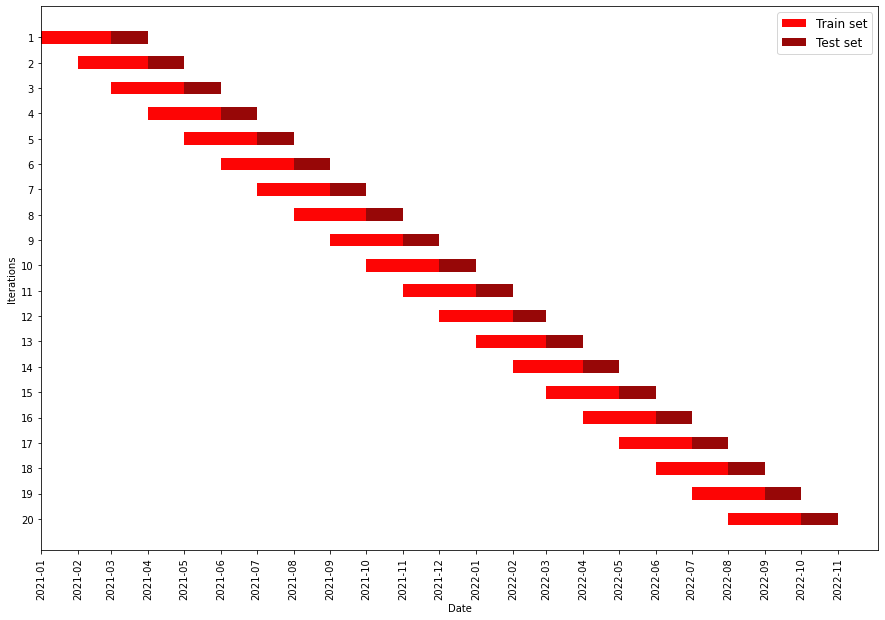

In [128]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df_ML = pd.DataFrame({'fulldate': pd.date_range(start='2021-01-01', end='2022-11-30', freq='M')})
df_ML['fulldate'] = df_ML['fulldate'].dt.to_period('M')
timestamps = df_ML['fulldate'].sort_values().unique()
start_dates = []
start_dates_2 = []
end_dates = []
end_dates_2 = []
i = 0
ii = 1
max_timestamp = timestamps.max() - 2

while timestamps[i] < max_timestamp:
    start_dates.append(pd.to_datetime(timestamps[i].start_time))
    end_dates.append(pd.to_datetime((timestamps[i]+2).end_time))
    start_dates_2.append(pd.to_datetime((timestamps[i]+2).start_time))
    end_dates_2.append(pd.to_datetime((timestamps[i]+3).start_time))
    i += 1
    ii += 1

# print(start_dates)
# print(start_dates_2)
# print(end_dates)
# print(end_dates_2)
# # Create a DataFrame for the Gantt chart
df_gantt = pd.DataFrame({'Start': start_dates, 'End': end_dates, 'start_2': start_dates_2, 'end_2': end_dates_2})
df_gantt['Task'] = df_gantt.index + 1  # Assign task numbers
#df_gantt
# Plot the Gantt chart
fig, ax = plt.subplots(figsize=(15, 10))
bar1 = ax.barh(y=df_gantt['Task'], left=df_gantt['Start'], width=df_gantt['End'] - df_gantt['Start'], height=0.5, color='#FD0505', label='Train set')
bar2 = ax.barh(y=df_gantt['Task'], left=df_gantt['start_2'], width=df_gantt['end_2'] - df_gantt['start_2'], height=0.5, color='#970707', label='Test set')

# Format the chart
ax.set_xlabel('Date')
ax.set_ylabel('Iterations')
ax.set_yticks(df_gantt['Task'])
ax.set_yticklabels(df_gantt['Task'])
ax.invert_yaxis()

# Fix the dates in the x-axis
date_format = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)

# Remove the last tick
ax.set_xticks(ax.get_xticks()[:-1])

# Add a legend
legend = ax.legend(handles=[bar1, bar2], fontsize='large')

# Show the Gantt chart
plt.show()
